In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/content/insurance-data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().round()

,age,bmi,children,charges
count,1338.0,1338.0,1338.0,1338.0
mean,39.0,31.0,1.0,13270.0
std,14.0,6.0,1.0,12110.0
min,18.0,16.0,0.0,1122.0
25%,27.0,26.0,0.0,4740.0
50%,39.0,30.0,1.0,9382.0
75%,51.0,35.0,2.0,16640.0
max,64.0,53.0,5.0,63770.0


In [5]:
df.duplicated().sum()

1

In [6]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum().all()

False

In [10]:
def apply(age):
  if age <= 2 :
    return 'Babys'
  elif age <= 12 :
    return 'Children'
  elif age <= 17 :
    return 'Teenagers'
  elif age <= 39 :
    return 'Young_Adults'
  elif age <= 59 :
    return 'Middle_Adults'
  else :
    return 'Old_Adults'

Age_categories = df['age'].apply(apply)
Age_categories.value_counts()

Young_Adults     673
Middle_Adults    550
Old_Adults       114
Name: age, dtype: int64

In [11]:
df.insert(1,'Age_categories',Age_categories)
df.head(2)

,age,Age_categories,sex,bmi,children,smoker,region,charges
0,19,Young_Adults,female,27.90,0,yes,southwest,16884.9240
1,18,Young_Adults,male,33.77,1,no,southeast,1725.5523


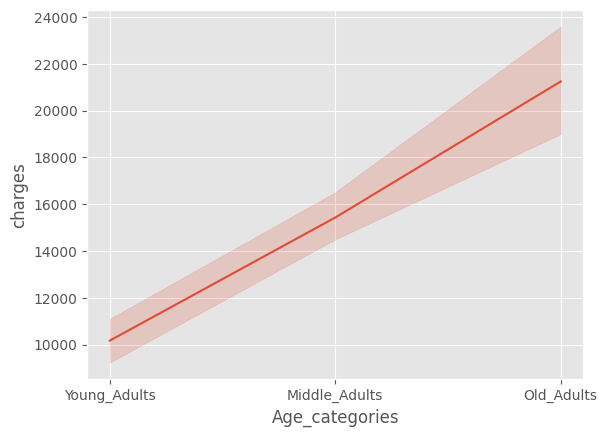

In [12]:
sns.lineplot(data = df , x = 'Age_categories' , y = 'charges')
plt.show()

## **Insight**

- the older you get , the higher insurence price (linear)

In [ ]:
sex_charges = df.groupby('sex').agg({'charges' : 'mean'})
sex_charges


sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

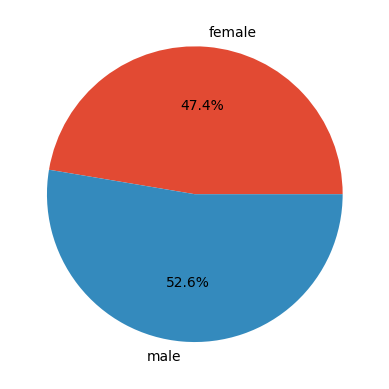

In [ ]:
plt.pie(sex_charges['charges'],labels=sex_charges.index , autopct='%1.1f%%')
plt.show()

## **Insight**

- Males is pay more than female


In [ ]:
def apply(x):
  if x <= 20 :
    return '10-20'
  elif x <= 30 :
    return '21-30'
  elif x <= 40 :
    return '31-40'
  elif x <= 50 :
    return '41-50'
  else :
    return '51-60'

bmi_categories = df['bmi'].apply(apply)
bmi_categories.value_counts()

31-40    613
21-30    592
41-50     88
10-20     41
51-60      3
Name: bmi, dtype: int64

In [ ]:
df.insert(4,'bmi_categories',bmi_categories)

In [ ]:
df.head(2)

,age,Age_categories,sex,bmi,bmi_categories,children,smoker,region,charges
0,19,Young_Adults,female,27.90,21-30,0,yes,southwest,16884.9240
1,18,Young_Adults,male,33.77,31-40,1,no,southeast,1725.5523


In [ ]:
bmi_charges = df.groupby('bmi_categories').agg({'charges' : 'mean'})
bmi_charges

,charges
bmi_categories,
10-20,8838.561135
21-30,10849.646837
31-40,15401.979574
41-50,16810.194303
51-60,16034.305367


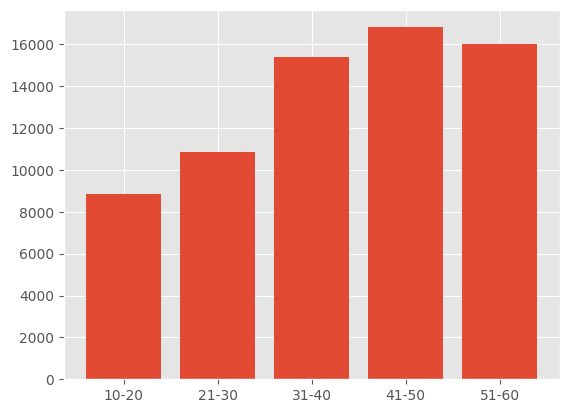

In [ ]:
plt.bar(bmi_charges.index , bmi_charges['charges'])
plt.show()

## **Insight**

- the higher bmi , the higher pay charges

In [ ]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
children_charges = df.groupby('children').agg({'charges' : 'mean'})
children_charges

,charges
children,
0,12384.695344
1,12731.171832
2,15073.563734
3,15355.318367
4,13850.656311
5,8786.035247


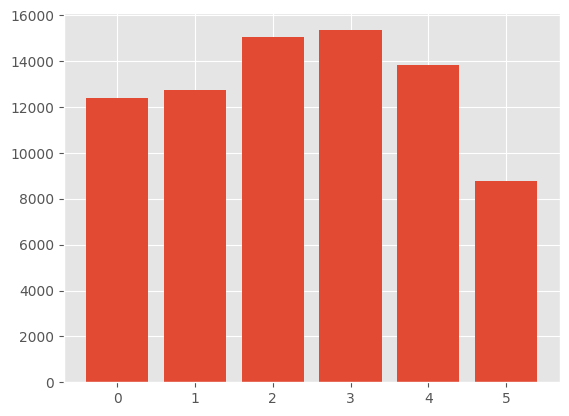

In [ ]:
plt.bar(children_charges.index , children_charges['charges'])
plt.show()

In [ ]:
smoker_charges = df.groupby('smoker').agg({'charges':'mean'})
smoker_charges

,charges
smoker,
no,8440.660307
yes,32050.231832


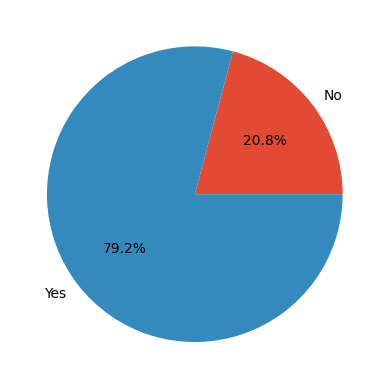

In [ ]:
plt.pie(smoker_charges['charges'],labels = ['No' ,'Yes'] ,autopct = '%1.1f%%')
plt.show()

## **Insight**

- Smokers is pay much more than other

In [ ]:
df['region'].value_counts()
region_charges = df.groupby('region').agg({'charges':'mean'})
region_charges

,charges
region,
northeast,13406.384516
northwest,12450.840844
southeast,14735.411438
southwest,12346.937377


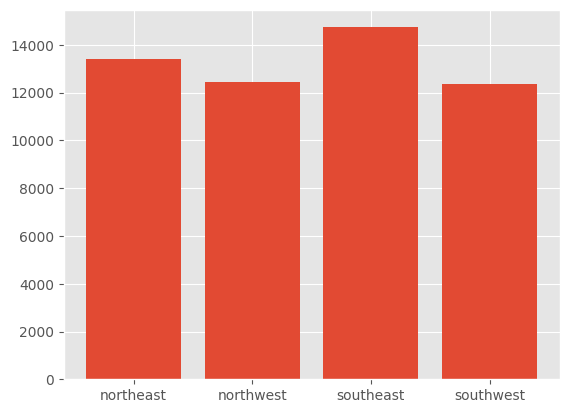

In [ ]:
plt.bar(region_charges.index,region_charges['charges'])
plt.show()

## Final Concloution  :

- there is a row duplicated
- there is no missing values
- the older you get , the higher insurence price (linear)
- Males is pay more than female
- the higher bmi , the higher pay charges
- Smokers is pay much more than other